In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('crypto_data_cleaned.csv' ,index_col=0)

In [3]:
data.shape

(1107, 13)

In [ ]:
data.head()

,_ADAUSDT_,_BTCUSDT_,_TRXUSDT_,_EOSUSDT_,_NEOUSDT_,_XLMUSDT_,_LINKUSDT_,_ZECUSDT_,_XRPUSDT_,_ETHUSDT_,_BNBUSDT_,_LTCUSDT_,_ETCUSDT_
Date,,,,,,,,,,,,,
21-03-19,0.05235,3980.64,0.02217,3.6185,8.921,0.10554,0.4548,55.14,0.30965,134.85,14.3511,58.54,4.7593
22-03-19,0.05779,3986.93,0.02251,3.6176,9.151,0.10815,0.4646,55.07,0.31041,135.98,15.1502,59.26,4.8519
23-03-19,0.06349,4006.01,0.02428,3.6647,9.354,0.10681,0.4608,56.90,0.31182,137.28,15.1397,60.89,4.8740
24-03-19,0.06151,3992.18,0.02324,3.6314,9.124,0.10437,0.4531,57.21,0.30787,136.09,17.1096,59.82,4.8234
25-03-19,0.05857,3936.12,0.02256,3.6500,8.917,0.10014,0.4734,55.32,0.30310,133.98,16.7631,59.04,4.6901


In [4]:
print('Null Values =',data.isnull().values.any())
data.shape

Null Values = True


(1107, 13)

In [ ]:
data.dropna()

In [ ]:
datareturns = data

normalizing the data between 0 to 1 to ensure stable results  

In [39]:
dfscaled = (data-data.min())/(data.max()-data.min())

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler().fit(datareturns)
# rescaledDataset = pd.DataFrame(scaler.fit_transform(datareturns),columns = datareturns.columns, index = datareturns.index)
# # summarize transformed data
# datareturns.dropna(how='any', inplace=True)
# rescaledDataset.dropna(how='any', inplace=True)
# rescaledDataset.head()

In [ ]:
# rescaledDataset.plot(figsize=(15,10),legend=False)
# plt.ylabel("Price")
# plt.title("Prices");

In [ ]:
# import numpy as np

# from sklearn import preprocessing

In [ ]:
# min_max_scaler = preprocessing.MinMaxScaler()

# scaled_x = min_max_scaler.fit_transform(data)

# scaled_x

In [ ]:


# dfscaled = pd.DataFrame(scaled_x)


Ensuring if the data is if the data is normalised 

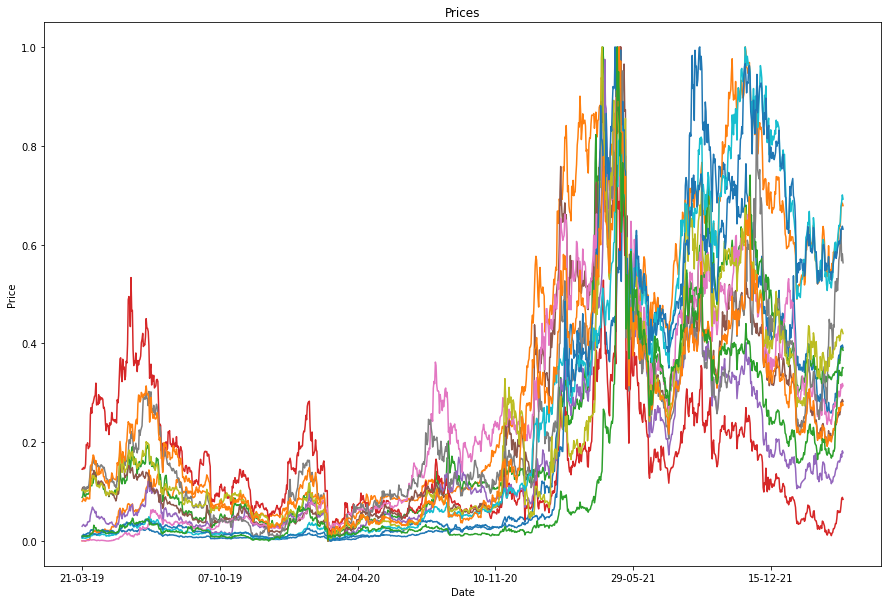

In [ ]:
dfscaled.plot(figsize=(15,10),legend=False)
plt.ylabel("Price")
plt.title("Prices");

HRP works in 3 stages 

Stage 1: Tree Clustering

Stage 2: Quasi-Diagonalization

Stage 3: Recursive-Bisection


In [12]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

Tree Data 

•	Group similar investments into clusters. 

•	Greater correlation means a Shorter distance 

•	Hierarchical structure: 

○	more stable 

○	more feasible 

○	more intuitive 


In [102]:
corr = dfscaled.corr()
cov = dfscaled.cov()

The figure displays the correlation matrix of the normalized data-set 

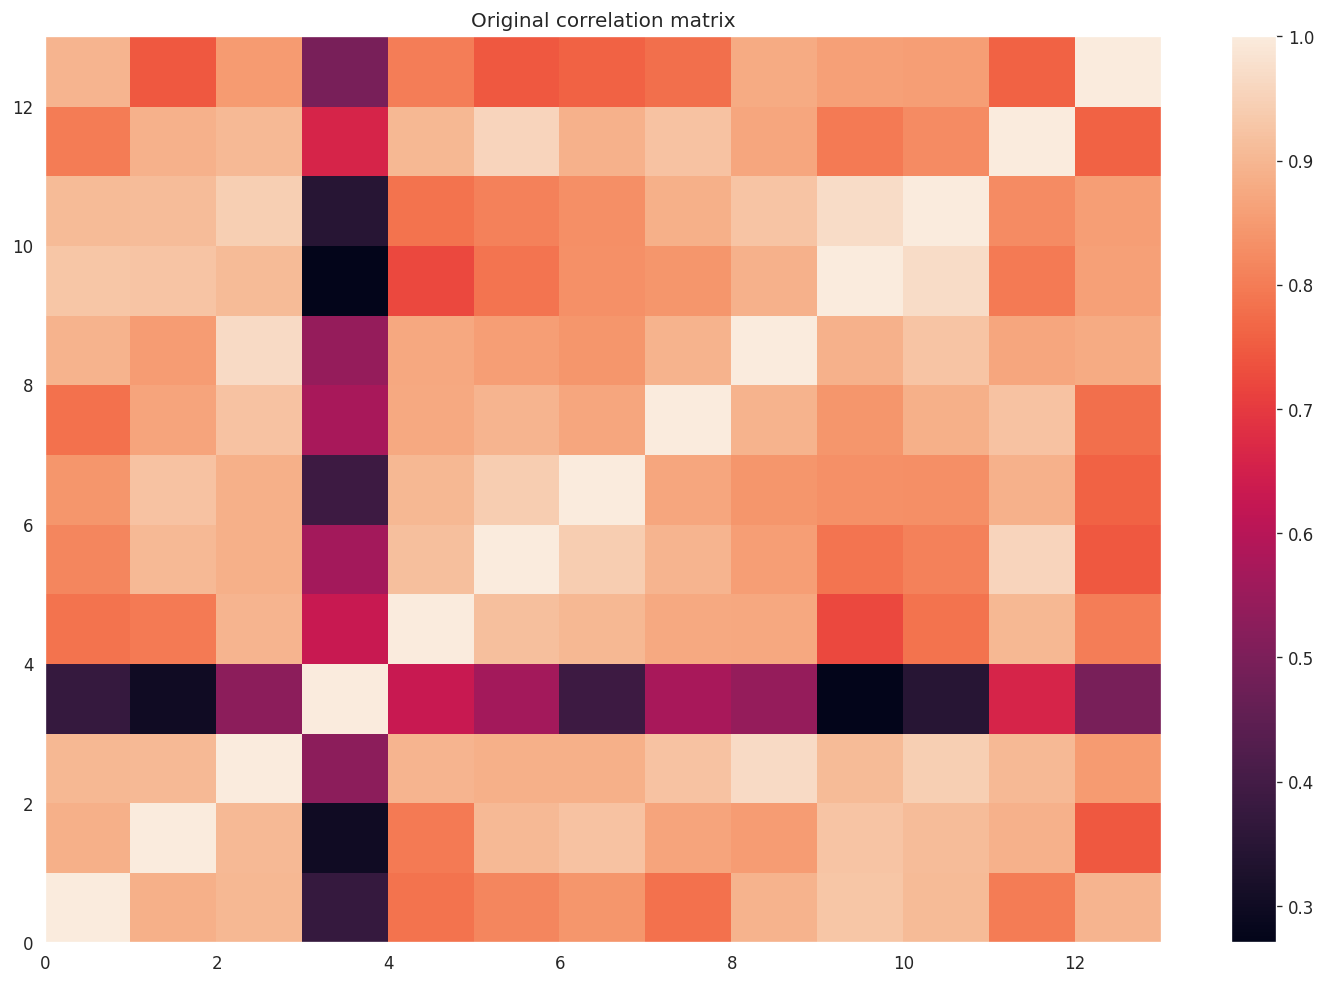

In [103]:
plt.figure(figsize=(15,10),dpi=120)
plt.pcolormesh(corr)
plt.colorbar()
plt.title('Original correlation matrix')
plt.show()

Distance 

Measuring distance of correlation matrix 

In [104]:
# Distance Measure of original correlation matrix
d = np.sqrt((1 - corr) / 2)

The first hand calculation of distance matrix prior to performing clustering  

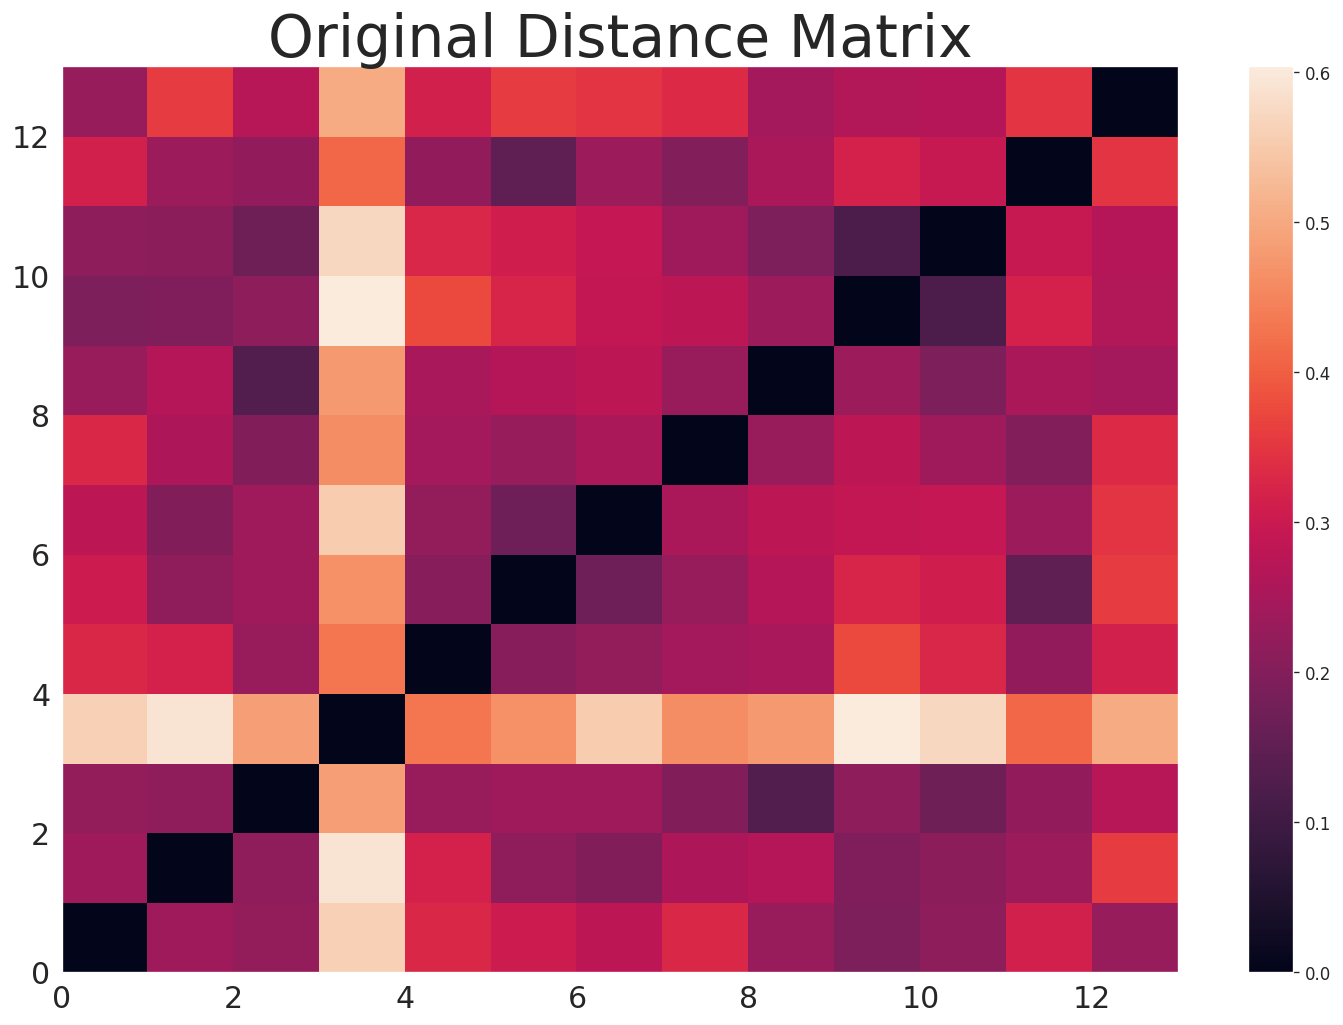

In [105]:
plt.figure(figsize=(15,10),dpi=120)
plt.pcolormesh(d)
plt.colorbar()
plt.title('Original Distance Matrix', fontsize=35)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

Function to creater tree clustering using eculidean distance metric 

In [106]:
def tree_clustering(dist_mat, method="single", metric =  'eculidean'):
    flat_dist_mat = squareform(dist_mat) 
    res_linkage = linkage(flat_dist_mat, method=method, metric = metric)
    return res_linkage

res_linkage = tree_clustering(d)

Creating Dendograms to understand the clusters 

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 <a list of 10 Text major ticklabel objects>)

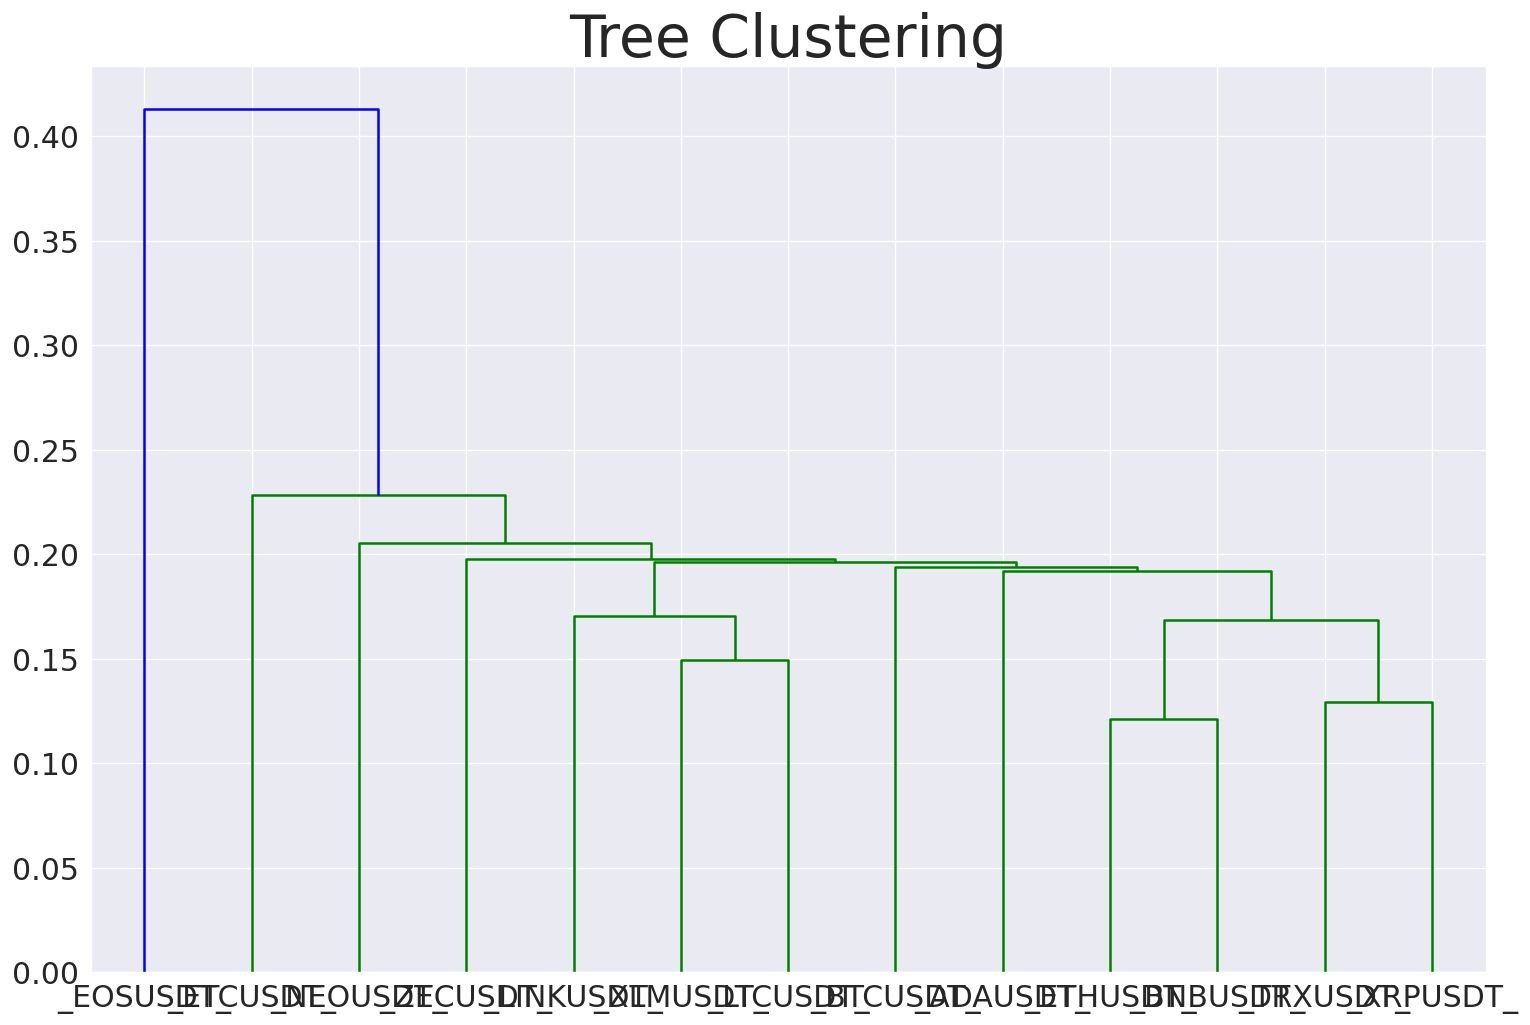

In [107]:
import seaborn as sns
# sns.set_context("talk")
sns.set_style("darkgrid")
plt.figure(figsize=(15,10),dpi=120)
dn = dendrogram(res_linkage, labels=corr.index.values) 
plt.title('Tree Clustering', fontsize=35)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

Stage 2: Quasi-Diagonalization


●	Reorganize the covariance matrix so similar investments will be placed together. 

●	This matrix diagonalization allow us to distribute weights optimally following an inverse-variance allocation. 


In [108]:
def seriation(Z, N, cur_index):
    """Returns the order implied by a hierarchical tree (dendrogram).
    
       :param Z: A hierarchical tree (dendrogram).
       :param N: The number of points given to the clustering process.
       :param cur_index: The position in the tree for the recursive traversal.
       
       :return: The order implied by the hierarchical tree Z.
    """
    if cur_index < N:
        return [cur_index]
    else:
        left = int(Z[cur_index - N, 0])
        right = int(Z[cur_index - N, 1])
        return (seriation(Z, N, left) + seriation(Z, N, right))

In [109]:


def compute_serial_matrix(dist_mat, method="single"):
    """Returns a sorted distance matrix.
    
       :param dist_mat: A distance matrix.
       :param method: A string in ["ward", "single", "average", "complete"].
        
        output:
            - seriated_dist is the input dist_mat,
              but with re-ordered rows and columns
              according to the seriation, i.e. the
              order implied by the hierarchical tree
            - res_order is the order implied by
              the hierarhical tree
            - res_linkage is the hierarhical tree (dendrogram)
        
        compute_serial_matrix transforms a distance matrix into 
        a sorted distance matrix according to the order implied 
        by the hierarchical tree (dendrogram)
    """
    N = len(dist_mat)
    flat_dist_mat = squareform(dist_mat)
    
    res_linkage = linkage(flat_dist_mat, method=method)
    res_order = seriation(res_linkage, N, N + N - 2)
    
    seriated_dist = np.zeros((N, N)) #ordered
    a,b = np.triu_indices(N, k=1)
    
    seriated_dist[a,b] = dist_mat[[res_order[i] for i in a], [res_order[j] for j in b]]
    seriated_dist[b,a] = seriated_dist[a,b] #0
    
    return seriated_dist, res_order, res_linkage    

ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(d.values)

Obsereve in below figure The ordered distance matrix has brought the crypos with similar weights together

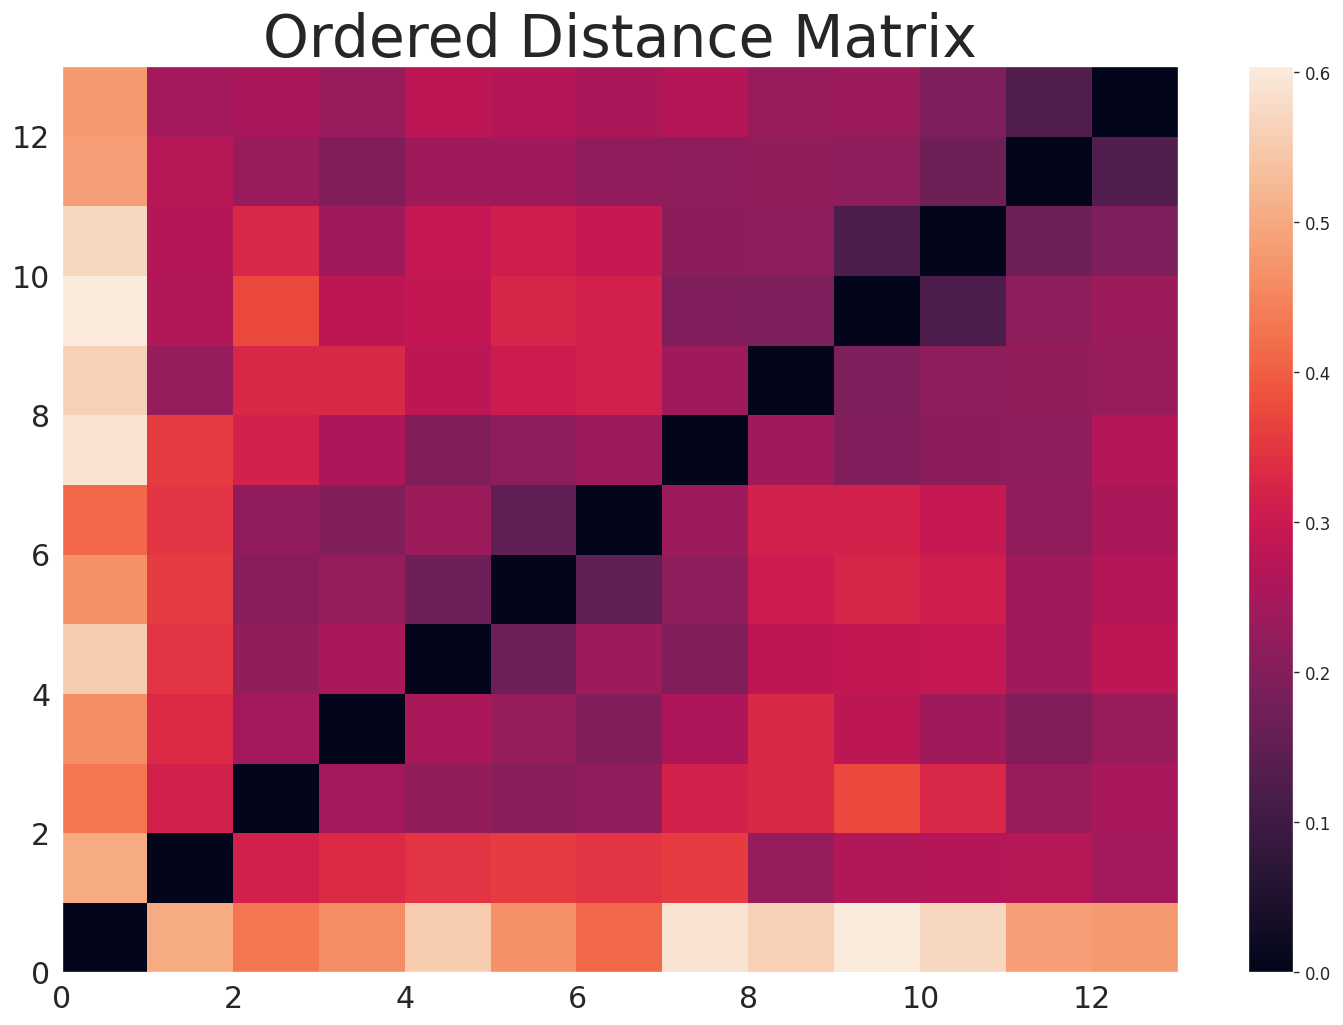

In [110]:
plt.figure(figsize=(15,10),dpi=120)
plt.pcolormesh(ordered_dist_mat)
plt.colorbar()
plt.title('Ordered Distance Matrix', fontsize=35)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

Stage 3: Recursive-Bisection

●	Distribute the allocation through recursive bisection based on cluster covariance. 

●	The bisection method is a root-finding method that applies to any continuous functions for which one knows two values with opposite signs.  


In [111]:
def compute_HRP_weights(covariances, res_order):
    weights = pd.Series(1, index=res_order)
    clustered_lists = [res_order] 
    while len(clustered_lists) > 0:
            # Bisect：clustered_lists list
            clustered_lists = [cluster[start:end] for cluster in clustered_lists
                                for start, end in ((0, len(cluster) // 2),
                                                   (len(cluster) // 2, len(cluster)))
                                if len(cluster) > 1]
            
            for subcluster in range(0, len(clustered_lists), 2):
                    left_cluster = clustered_lists[subcluster] # divide into groups every two lists; take the left cluster (list)
                    right_cluster = clustered_lists[subcluster + 1] # take the right cluster (list)

                    left_subcovar = covariances.iloc[left_cluster, left_cluster] # the covariance matrix of the indexes in left clusters
                    inv_diag = 1 / np.diag(left_subcovar.values) 
                    parity_w = inv_diag * (1 / np.sum(inv_diag)) 
                    left_cluster_var = np.dot(parity_w, np.dot(left_subcovar, parity_w)) 

                    right_subcovar = covariances.iloc[right_cluster, right_cluster] # the covariance matrix of the indexes in right clusters
                    inv_diag = 1 / np.diag(right_subcovar.values)
                    parity_w = inv_diag * (1 / np.sum(inv_diag))
                    right_cluster_var = np.dot(parity_w, np.dot(right_subcovar, parity_w))

                    alloc_factor = 1 - left_cluster_var / (left_cluster_var + right_cluster_var)

                    weights[left_cluster] *= alloc_factor #weightsof left_cluster index
                    weights[right_cluster] *= 1 - alloc_factor

    return weights               
compute_HRP_weights(cov, res_order)

3     0.331251
12    0.089803
4     0.087995
7     0.110701
6     0.042030
5     0.048362
11    0.107876
1     0.021111
0     0.028458
9     0.022213
10    0.020892
2     0.043842
8     0.045466
dtype: float64

In [129]:
weights 

OrderedDict([('_ADAUSDT_', 0.02846),
             ('_BTCUSDT_', 0.02111),
             ('_TRXUSDT_', 0.04384),
             ('_EOSUSDT_', 0.33125),
             ('_NEOUSDT_', 0.088),
             ('_XLMUSDT_', 0.04836),
             ('_LINKUSDT_', 0.04203),
             ('_ZECUSDT_', 0.1107),
             ('_XRPUSDT_', 0.04547),
             ('_ETHUSDT_', 0.02221),
             ('_BNBUSDT_', 0.02089),
             ('_LTCUSDT_', 0.10788),
             ('_ETCUSDT_', 0.0898)])

In [130]:
for key, value in weights.items():
    print(key, value)

_ADAUSDT_ 0.02846
_BTCUSDT_ 0.02111
_TRXUSDT_ 0.04384
_EOSUSDT_ 0.33125
_NEOUSDT_ 0.088
_XLMUSDT_ 0.04836
_LINKUSDT_ 0.04203
_ZECUSDT_ 0.1107
_XRPUSDT_ 0.04547
_ETHUSDT_ 0.02221
_BNBUSDT_ 0.02089
_LTCUSDT_ 0.10788
_ETCUSDT_ 0.0898


In [131]:
for key, value in weights.items():
    print(key)

_ADAUSDT_
_BTCUSDT_
_TRXUSDT_
_EOSUSDT_
_NEOUSDT_
_XLMUSDT_
_LINKUSDT_
_ZECUSDT_
_XRPUSDT_
_ETHUSDT_
_BNBUSDT_
_LTCUSDT_
_ETCUSDT_


In [134]:
#To make a pie chart put all the names and their weights in two  lists 
name = []
weight = []
for key, value in weights.items():
    name.append(key)
    weight.append(value)


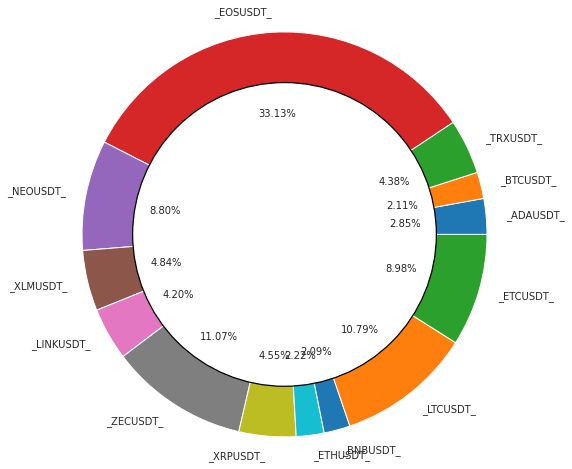

In [137]:
#labels = port_list
# weights1 = compute_HRP_weights(cov, res_order)
#explode = (0,0,0,0,0,0,0,0,0,0,0)

plt.pie(weight,labels = name, autopct='%.2f%%', shadow=False)
#Add a circle to give dougnut appearance 
circle = plt.Circle((0,0), 0.75, color='black', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(circle)
plt.axis('equal')
fig.set_size_inches(8,8)
plt.show()